# Notebook 3 - Matplotlib Life Cycle of a Plot - Auto Dataset

In [1]:
#Reference : https://matplotlib.org/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare Data

In [2]:
#Read the text file, its space separated
csv_path='auto-mpg.csv'
df = pd.read_csv(csv_path, header= None)

In [3]:
#remove na values
df.dropna(inplace = True) 
df.head()

,0
0,18.0 8 307.0 130.0 3504. 12...
1,15.0 8 350.0 165.0 3693. 11...
2,18.0 8 318.0 150.0 3436. 11...
3,16.0 8 304.0 150.0 3433. 12...
4,17.0 8 302.0 140.0 3449. 10...


In [4]:
#Convert the space separated values file into columns using custom split logic 

first_part = df[0].str.split("   ", n = 9, expand = True)  #first split based on three white spaces
#print(first_part.head())

remaining_part1 = first_part[9].str.split(" ", n = 1, expand = True) # second split on remaining items using single white space
#print(remaining_part1.head())

remaining_part2 = remaining_part1[1].str.split(" ", n = 1, expand = True) # third split on remaining items using  white space
#print(remaining_part2.head())

last_part = remaining_part2[1].str.split("1\t", n = 1, expand = True) # last plit on remaining items using tab
#print(last_part.head())

In [5]:
#Frame the dataframe
auto_dataframe = pd.DataFrame()

auto_dataframe["mpg"] = first_part[0]
auto_dataframe["cylinders"] = first_part[1]
auto_dataframe["displacement"] = first_part[2]
auto_dataframe["horsepower"] = first_part[4]
auto_dataframe["weight"] = first_part[6]
auto_dataframe["weight"] = auto_dataframe["weight"].str.replace(".", "")
auto_dataframe["acceleration"] = first_part[8]
auto_dataframe["model_year"] = remaining_part1[0]
auto_dataframe["car_name"] = last_part[1]
auto_dataframe["car_name"] = auto_dataframe["car_name"].str.replace("\"", "")

auto_dataframe.head()
df = auto_dataframe

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino


In [6]:
df["mpg"] = pd.to_numeric(df["mpg"])
df["cylinders"] = pd.to_numeric(df["cylinders"])
df["displacement"] = pd.to_numeric(df["displacement"])
df["weight"] = pd.to_numeric(df["weight"])
df["acceleration"] = pd.to_numeric(df["acceleration"])
df["displacement"] = pd.to_numeric(df["displacement"])
df["model_year"] = df["model_year"].astype(str)
df["car_name"] = df["car_name"].astype(str)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino


In [7]:
cylinders = df["cylinders"].unique()

In [8]:
#form groups first
df_by_cylinders = df.groupby('cylinders')
df_by_cylinders

In [10]:
average_mpg = df_by_cylinders.mpg.mean()
average_mpg

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.982178
Name: mpg, dtype: float64

# Basic Plots

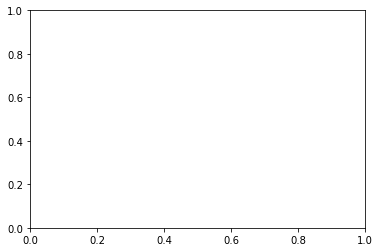

In [15]:
fig, ax = plt.subplots()
plt.show()

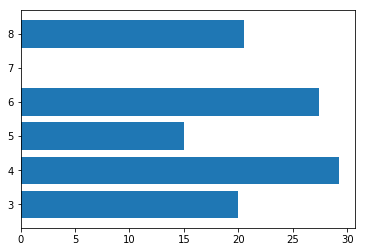

In [16]:
fig, ax = plt.subplots()
ax.barh(cylinders, average_mpg)
plt.show()

# Styling the Plot

In [19]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [26]:
plt.style.use('seaborn')

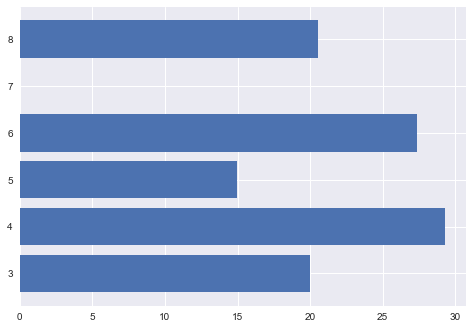

In [27]:
fig, ax = plt.subplots()
ax.barh(cylinders, average_mpg)
plt.show()

# Decorating the Plot

In [ ]:
fig, ax = plt.subplots()
ax.barh(cylinders, average_mpg)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()

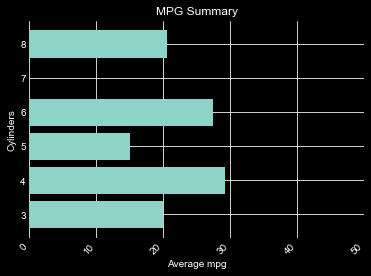

In [24]:
fig, ax = plt.subplots()
ax.barh(cylinders, average_mpg)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 50], xlabel='Average mpg', ylabel='Cylinders',
       title='MPG Summary')
plt.show()

# Saving the Plot

In [ ]:
print(fig.canvas.get_supported_filetypes())

In [25]:
fig.savefig('avg_mpg.png', transparent=False, dpi=80, bbox_inches="tight")